<a href="https://colab.research.google.com/github/ashiyaaa121/AI-worksheet/blob/main/2462227_AshiyaKhatri_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================================================
# Problem 1A: Single Year HDI Exploration (Latest Year: 2022)
# ============================================================

import pandas as pd              # Pandas for data handling
import numpy as np               # NumPy for numerical operations

# ------------------------------------------------------------
# 1. Load dataset
# ------------------------------------------------------------
df = pd.read_csv(
    "Human_Development_Index_Dataset.csv",
    encoding="latin1"            # Encoding used to avoid reading errors
)

print("Dataset loaded successfully.")

# Clean column names
df.columns = df.columns.str.strip().str.lower()
# Remove extra spaces and convert column names to lowercase


print("\nCleaned column names:")
print(df.columns.tolist())         # Display cleaned column names

# ------------------------------------------------------------
# 2. Extract Latest Year (2022)
# ------------------------------------------------------------
hdi_2022_df = df[df['year'] == 2022].copy()
# Filter data to include only records from the year 2022

print("\nHDI 2022 data extracted.")

# ------------------------------------------------------------
# 3. Basic Data Exploration
# ------------------------------------------------------------
print("\nFirst 10 rows:")
print(hdi_2022_df.head(10))        # Display first 10 rows of 2022 data

rows, cols = hdi_2022_df.shape     # Get number of rows and columns
print(f"\nRows: {rows}, Columns: {cols}")

print("\nData types:")
print(hdi_2022_df.info())            # Show column data types and missing values



Dataset loaded successfully.

Cleaned column names:
['unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons']

HDI 2022 data extracted.

First 10 rows:
     unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND            

In [ ]:
# ============================================================
# Problem 1A: Single Year HDI Exploration (Latest Year: 2022)
# ============================================================
# ------------------------------------------------------------
# 4. Missing Values & Cleaning
# ------------------------------------------------------------
print("\nMissing values per column:")
print(hdi_2022_df.isnull().sum())        # Count missing values in each column

# Replace dash-like missing values
hdi_2022_df.replace(["–", "-", "—"], np.nan, inplace=True)        # Common symbols used for missing data
                                                                  # Replace them with NaN
# ------------------------------------------------------------
# 5. Automatically detect numeric columns
# ------------------------------------------------------------
numeric_columns = hdi_2022_df.select_dtypes(include=['int64', 'float64']).columns.tolist() # Identify numeric columns automatically

print("\nNumeric columns detected:")
print(numeric_columns)

# Convert numeric columns safely
for col in numeric_columns:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')   # Invalid values become NaN


Missing values per column:
unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64

In [ ]:
# ============================================================
# Problem 1A: Single Year HDI Exploration (Latest Year: 2022)
# ============================================================
# ------------------------------------------------------------
# 6. Handle Missing Values (Mean Imputation)
# ------------------------------------------------------------
hdi_2022_df[numeric_columns] = hdi_2022_df[numeric_columns].fillna(
    hdi_2022_df[numeric_columns].mean() # Replace missing values with column mean
)

print("\nMissing values handled using mean imputation.") # Confirm cleaning step

# ------------------------------------------------------------
# 7. Remove duplicates
# ------------------------------------------------------------
print("\nDuplicate rows:", hdi_2022_df.duplicated().sum())  # Count duplicate rows
hdi_2022_df.drop_duplicates(inplace=True)                   # Remove duplicate rows


Missing values handled using mean imputation.

Duplicate rows: 0


In [ ]:
# ============================================================
# Problem 1A: Single Year HDI Exploration (Latest Year: 2022)
# ============================================================
# ------------------------------------------------------------
# 8. Basic HDI Statistics
# ------------------------------------------------------------
print("\nHDI Statistics (2022):")

# Calculate the average HDI value across all countries in 2022
print("Mean:", hdi_2022_df['hdi'].mean())

# Find the middle HDI value when all countries are ordered
print("Median:", hdi_2022_df['hdi'].median())

# Measure how much HDI values vary from the mean
print("Standard Deviation:", hdi_2022_df['hdi'].std())

# Identify countries with the highest and lowest HDI
print("\nCountry with highest HDI:")

# idxmax() finds the row index with the maximum HDI value
# loc[] is then used to display the country name and its HDI
print(hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax(), ['country', 'hdi']])

print("\nCountry with lowest HDI:")

# idxmin() finds the row index with the minimum HDI value
print(hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin(), ['country', 'hdi']])

# ------------------------------------------------------------
# 9. Filtering and Sorting
# ------------------------------------------------------------
# Filter countries with very high human development (HDI > 0.800)
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

# Select the first numeric column (excluding HDI) for sorting
# This avoids hardcoding a column name and keeps the code flexible
sort_column = [col for col in numeric_columns if col != 'hdi'][0]

# Sort the filtered countries based on the selected numeric column
# Countries with higher values appear at the top
high_hdi_sorted = high_hdi_df.sort_values(
    by=sort_column,
    ascending=False
)

# Display the top 10 high-HDI countries after sorting
print(f"\nTop 10 countries with HDI > 0.800 (sorted by {sort_column}):")
print(high_hdi_sorted.head(10))


HDI Statistics (2022):
Mean: 0.7228872549019609
Median: 0.739
Standard Deviation: 0.1522804922705457

Country with highest HDI:
country    Switzerland
hdi              0.967
Name: 5609, dtype: object

Country with lowest HDI:
country    Somalia
hdi           0.38
Name: 5345, dtype: object

Top 10 countries with HDI > 0.800 (sorted by unnamed: 0):
      unnamed: 0      iso3                      country  year    hdi  \
6665        6666   ZZG.ECA      Europe and Central Asia  2022  0.802   
6467        6468  ZZA.VHHD  Very high human development  2022  0.902   
6203        6204       URY                      Uruguay  2022  0.830   
6170        6171       USA                United States  2022  0.927   
6137        6138       GBR               United Kingdom  2022  0.940   
6104        6105       ARE         United Arab Emirates  2022  0.937   
5939        5940       TUR                      Türkiye  2022  0.855   
5873        5874       TTO          Trinidad and Tobago  2022  0.814   
57

In [ ]:
# ============================================================
# Problem 1A: Single Year HDI Exploration (Latest Year: 2022)
# ============================================================
# ------------------------------------------------------------
# 10. HDI Category Column
# ------------------------------------------------------------
def classify_hdi(hdi):
   # Classify HDI values based on UNDP-style thresholds
   # This helps group countries by development level
    if hdi < 0.550:
        return "Low"        # Low human development
    elif hdi <= 0.699:
        return "Medium"     # Medium human development
    elif hdi <= 0.799:
        return "High"       # High human development
    else:
        return "Very High"  # Very high human development

# Apply the classification function to the HDI column
# A new column is created showing the HDI category for each country
hdi_2022_df['hdi category'] = hdi_2022_df['hdi'].apply(classify_hdi)

print("\nHDI Category distribution:")
print(hdi_2022_df['hdi category'].value_counts()) # Count countries in each HDI category

# ------------------------------------------------------------
# 11. Save Final Dataset
# ------------------------------------------------------------
# Save the cleaned and categorized dataset to a new CSV file
# index=False prevents pandas from saving row numbers
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)

print("\nFile saved as HDI_category_added.csv")



HDI Category distribution:
hdi category
Very High    71
High         56
Medium       44
Low          35
Name: count, dtype: int64

File saved as HDI_category_added.csv


In [ ]:
# ============================================================
# Problem 1B – HDI Visualization and Trend Analysis (2020–2022)
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Load dataset
# ------------------------------------------------------------
df = pd.read_csv("Human_Development_Index_Dataset.csv", encoding="latin1")
# Read the HDI dataset with proper encoding

# ------------------------------------------------------------
# Standardize column names
# ------------------------------------------------------------
df.columns = df.columns.str.strip().str.lower()
# Remove extra spaces and convert column names to lowercase for consistency

# ------------------------------------------------------------
# Filter years 2020–2022
# ------------------------------------------------------------
years_required = [2020, 2021, 2022]
hdi_df = df[df['year'].isin(years_required)].copy()
# Keep only the rows for the last 3 years for trend analysis

# ------------------------------------------------------------
# Data cleaning
# ------------------------------------------------------------
# Replace dash-like symbols with NaN for proper numeric handling
hdi_df.replace(["–", "-", "—"], np.nan, inplace=True)

# Standardize country names: strip spaces and capitalize properly
hdi_df['country'] = (
    hdi_df['country']
    .astype(str)
    .str.strip()
    .str.title()
)

# Identify numeric columns and convert them safely
numeric_cols = hdi_df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    hdi_df[col] = pd.to_numeric(hdi_df[col], errors='coerce')

# Remove rows with missing essential values and duplicate rows
hdi_df.dropna(subset=['hdi', 'country', 'year'], inplace=True)
hdi_df.drop_duplicates(inplace=True)

# Original print statement restored
print("Data cleaning completed.")  # Confirm cleaning step

# Save the cleaned dataset for Problem 1B
hdi_df.to_csv("HDI_problem1B.csv", index=False)
print("Saved cleaned dataset as HDI_problem1B.csv")


Data cleaning completed.
Saved cleaned dataset as HDI_problem1B.csv


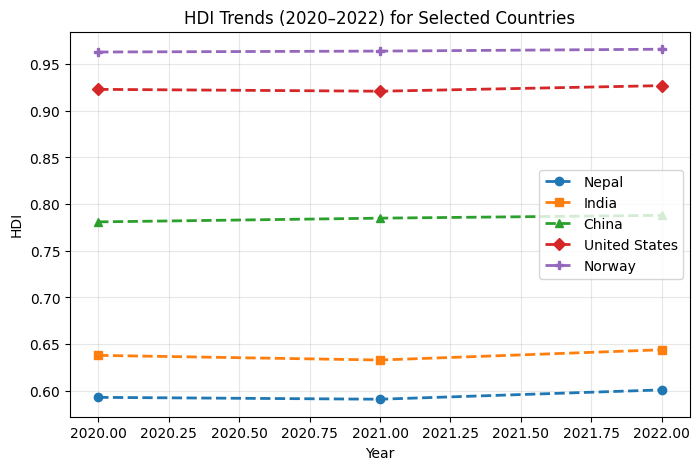

In [ ]:
# ============================================================
# Problem 1B – HDI Visualization and Trend Analysis (2020–2022)
# ============================================================
# ============================================================
# 3A. LINE CHART — HDI TREND (COUNTRY LEVEL)
# ============================================================

# Select specific countries to visualize their HDI trends
selected_countries = [
    'Nepal', 'India', 'China',
    'United States', 'Norway'
]

# Filter the dataset to include only the selected countries
country_df = hdi_df[hdi_df['country'].isin(selected_countries)]

# Set up the figure size for the plot
plt.figure(figsize=(8, 5))

# Define colors and markers for each country for distinction
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
markers = ['o', 's', '^', 'D', 'P']

# Plot HDI trend for each selected country
for country, color, marker in zip(selected_countries, colors, markers):
    temp = country_df[country_df['country'] == country]
    plt.plot(
        temp['year'],       # x-axis: year
        temp['hdi'],        # y-axis: HDI value
        marker=marker,      # Marker for data points
        linestyle='--',     # Dashed line for trend
        linewidth=2,        # Line thickness
        color=color,        # Line color
        label=country       # Legend label
    )

# Add labels and title
plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Trends (2020–2022) for Selected Countries")

# Show legend and grid for readability
plt.legend()
plt.grid(alpha=0.3)

# Display the plot
plt.show()


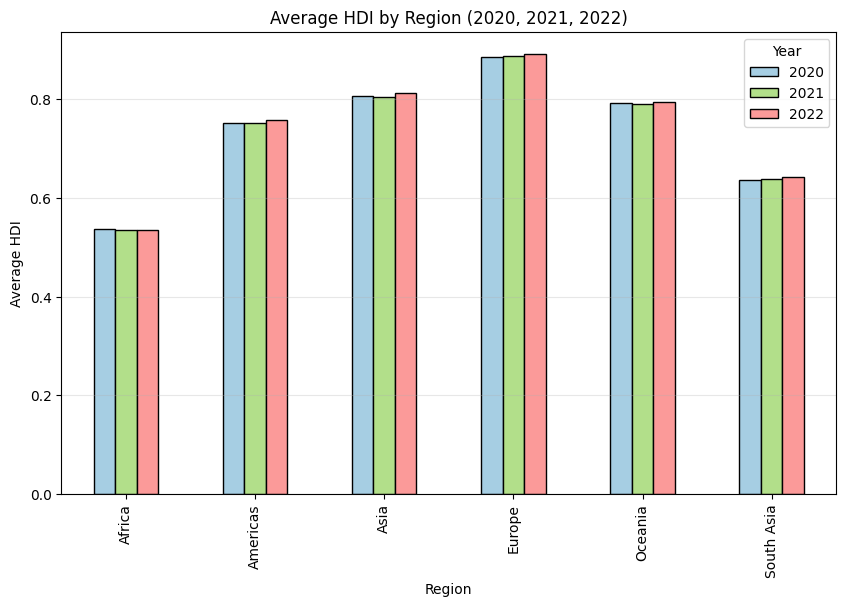

In [ ]:
# ============================================================
# Problem 1B – HDI Visualization and Trend Analysis (2020–2022)
# ============================================================
# ============================================================
# 3B(i). BAR CHART — AVERAGE HDI BY REGION, SEPARATE YEARS
# ============================================================

import matplotlib.pyplot as plt
import pandas as pd

# ------------------------------------------------------------
# Region mapping using ISO3 country codes
# ------------------------------------------------------------
# Map each country code to its region for regional analysis
region_map = {
    # South Asia
    'AFG': 'South Asia', 'BGD': 'South Asia', 'BTN': 'South Asia',
    'IND': 'South Asia', 'MDV': 'South Asia', 'NPL': 'South Asia',
    'PAK': 'South Asia', 'LKA': 'South Asia',

    # Europe
    'ALB': 'Europe', 'AND': 'Europe', 'AUT': 'Europe', 'BEL': 'Europe',
    'BIH': 'Europe', 'BGR': 'Europe', 'HRV': 'Europe', 'CYP': 'Europe',
    'CZE': 'Europe', 'DNK': 'Europe', 'EST': 'Europe', 'FIN': 'Europe',
    'FRA': 'Europe', 'DEU': 'Europe', 'GRC': 'Europe', 'HUN': 'Europe',
    'ISL': 'Europe', 'IRL': 'Europe', 'ITA': 'Europe', 'LVA': 'Europe',
    'LTU': 'Europe', 'LUX': 'Europe', 'MLT': 'Europe', 'NLD': 'Europe',
    'NOR': 'Europe', 'POL': 'Europe', 'PRT': 'Europe', 'ROU': 'Europe',
    'RUS': 'Europe', 'SRB': 'Europe', 'SVK': 'Europe', 'SVN': 'Europe',
    'ESP': 'Europe', 'SWE': 'Europe', 'CHE': 'Europe', 'UKR': 'Europe',
    'GBR': 'Europe',

    # Africa
    'DZA': 'Africa', 'AGO': 'Africa', 'BEN': 'Africa', 'BWA': 'Africa',
    'BFA': 'Africa', 'BDI': 'Africa', 'CMR': 'Africa', 'CAF': 'Africa',
    'TCD': 'Africa', 'COD': 'Africa', 'CIV': 'Africa', 'DJI': 'Africa',
    'EGY': 'Africa', 'ETH': 'Africa', 'GHA': 'Africa', 'KEN': 'Africa',
    'LSO': 'Africa', 'LBR': 'Africa', 'MDG': 'Africa', 'MWI': 'Africa',
    'MLI': 'Africa', 'MAR': 'Africa', 'MOZ': 'Africa', 'NAM': 'Africa',
    'NER': 'Africa', 'NGA': 'Africa', 'RWA': 'Africa', 'SEN': 'Africa',
    'SLE': 'Africa', 'SOM': 'Africa', 'ZAF': 'Africa', 'SSD': 'Africa',
    'TZA': 'Africa', 'TUN': 'Africa', 'UGA': 'Africa', 'ZMB': 'Africa',
    'ZWE': 'Africa',

    # Americas
    'ARG': 'Americas', 'BOL': 'Americas', 'BRA': 'Americas', 'CAN': 'Americas',
    'CHL': 'Americas', 'COL': 'Americas', 'CRI': 'Americas', 'CUB': 'Americas',
    'DOM': 'Americas', 'ECU': 'Americas', 'GTM': 'Americas', 'HTI': 'Americas',
    'HND': 'Americas', 'JAM': 'Americas', 'MEX': 'Americas', 'NIC': 'Americas',
    'PAN': 'Americas', 'PER': 'Americas', 'PRY': 'Americas', 'USA': 'Americas',
    'URY': 'Americas', 'VEN': 'Americas',

    # Asia (excluding South Asia)
    'CHN': 'Asia', 'JPN': 'Asia', 'KOR': 'Asia', 'IDN': 'Asia',
    'IRN': 'Asia', 'IRQ': 'Asia', 'ISR': 'Asia', 'KAZ': 'Asia',
    'KWT': 'Asia', 'MYS': 'Asia', 'MNG': 'Asia', 'MMR': 'Asia',
    'PHL': 'Asia', 'QAT': 'Asia', 'SAU': 'Asia', 'SGP': 'Asia',
    'THA': 'Asia', 'TUR': 'Asia', 'ARE': 'Asia', 'VNM': 'Asia',

    # Oceania
    'AUS': 'Oceania', 'NZL': 'Oceania', 'PNG': 'Oceania', 'FJI': 'Oceania'
}

# Map ISO3 codes to regions
hdi_df['region'] = hdi_df['iso3'].map(region_map)
# Drop rows where region could not be mapped
hdi_df = hdi_df.dropna(subset=['region'])

# ------------------------------------------------------------
# Group data by region and year, then calculate average HDI
# ------------------------------------------------------------
region_year_hdi = (
    hdi_df
    .groupby(['region', 'year'])['hdi']   # Group by region and year
    .mean()                               # Calculate mean HDI
    .unstack()        # Create separate columns for each year
)


light_colors = ['#a6cee3', '#b2df8a', '#fb9a99']  # Light blue, green, pink

# Plot grouped bar chart with light colors
region_year_hdi.plot(
    kind='bar',
    figsize=(10, 6),
    edgecolor='black',
    color=light_colors
)

# Add labels and title
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.title("Average HDI by Region (2020, 2021, 2022)")

# Add legend and light horizontal grid lines
plt.legend(title="Year")
plt.grid(axis='y', alpha=0.3)

# Display the plot
plt.show()


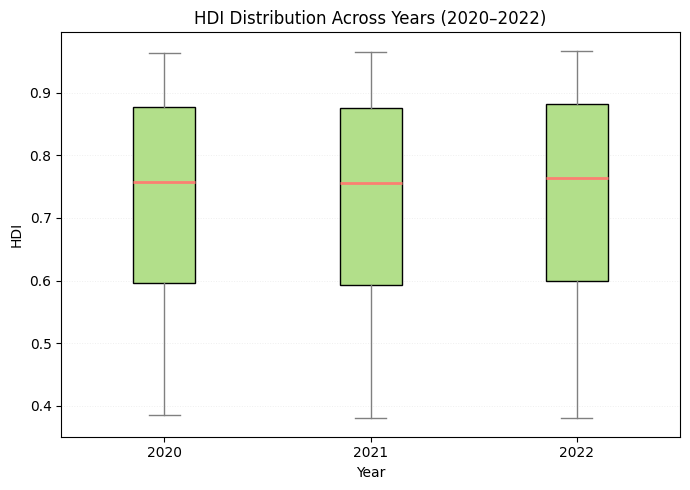

In [ ]:
# ============================================================
# Problem 1B – HDI Visualization and Trend Analysis (2020–2022)
# ============================================================
# -----------------------------
# 3B(ii). BOX PLOT — HDI Distribution by Year
# -----------------------------

# Extract HDI values for each year
data_2020 = hdi_df[hdi_df['year'] == 2020]['hdi']
data_2021 = hdi_df[hdi_df['year'] == 2021]['hdi']
data_2022 = hdi_df[hdi_df['year'] == 2022]['hdi']

# Set up figure size
plt.figure(figsize=(7, 5))

# Create a box plot for HDI distribution across the three years
plt.boxplot(
    [data_2020, data_2021, data_2022],  # Data for each year
    patch_artist=True,                  # Fill boxes with color
    boxprops=dict(facecolor='#b2df8a', edgecolor='black'), # Box appearance
    medianprops=dict(color='#fb8072', linewidth=2),        # Median line style
    whiskerprops=dict(color='gray', linewidth=1),          # Whisker style
    capprops=dict(color='gray', linewidth=1),              # Cap style
    flierprops=dict(marker='o', markerfacecolor='#a6cee3', alpha=0.7) # Outliers
)

# Label x-axis with years
plt.xticks([1,2,3], ['2020','2021','2022'])
plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Distribution Across Years (2020–2022)")

# Add light horizontal grid lines for readability
plt.grid(axis='y', alpha=0.2, linestyle=':', linewidth=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

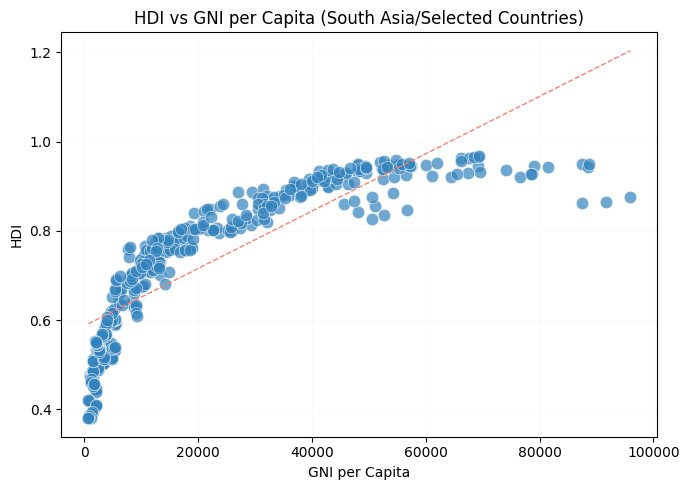

In [ ]:
# ============================================================
# Problem 1B – HDI Visualization and Trend Analysis (2020–2022)
# ============================================================
# ============================================================
# 3B(iii). SCATTER PLOT — HDI vs GNI PER CAPITA (Simple Design)
# ============================================================

gni_col = 'gross_inc_percap'

if gni_col in hdi_df.columns:
    plt.figure(figsize=(7, 5))

    # Scatter points
    plt.scatter(
        hdi_df[gni_col],
        hdi_df['hdi'],
        alpha=0.7,            # Slight transparency
        s=80,                 # Larger marker size
        color='#3182bd',      # dark blue
        edgecolor='white',    # White edge for contrast
        linewidth=0.5
    )

    # Regression line (thin, dashed, soft red)
    clean_x = hdi_df[gni_col].dropna()
    clean_y = hdi_df['hdi'].dropna()
    if len(clean_x) > 1:
        m, b = np.polyfit(clean_x, clean_y, 1)
        x_vals = np.linspace(clean_x.min(), clean_x.max(), 100)
        plt.plot(
            x_vals,
            m * x_vals + b,
            linestyle='--',
            color='#fb8072',   # Soft red
            linewidth=1
        )

    # Labels and title
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.title("HDI vs GNI per Capita (South Asia/Selected Countries)")

    # Minimal grid
    plt.grid(alpha=0.2, linestyle=':', linewidth=0.7)

    # Tight layout for clean appearance
    plt.tight_layout()
    plt.show()

else:
    print("GNI per Capita variable not available in the dataset.")


In [ ]:
# ============================================================
# Problem 2: Advanced HDI Exploration
# ============================================================

# ============================================================
# 1. LOAD DATASET
# ============================================================
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the HDI dataset
df = pd.read_csv("Human_Development_Index_Dataset.csv", encoding="latin1")

#Standardize column names: remove spaces and convert to lowercase
df.columns = df.columns.str.strip().str.lower()

# ============================================================
# 2. DATA CLEANING
# ============================================================

# Replace dash-like symbols with NaN for consistent missing values
df.replace(["–", "-", "—"], np.nan, inplace=True)

# Clean country names: remove extra spaces and capitalize properly
df['country'] = df['country'].astype(str).str.strip().str.title()

# Convert all numeric columns to numbers safely, non-numeric becomes NaN
numeric_cols = df.columns.drop('country')
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# ============================================================
# 3. CREATE SOUTH ASIA SUBSET AND SAVE CSV
# ============================================================

# List of South Asian countries
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter the dataset for South Asia and make a copy
south_asia_df = df[df['country'].isin(south_asia_countries)].copy()

# Save the South Asia subset to a new CSV file
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)
print("Saved: HDI_SouthAsia.csv")



Saved: HDI_SouthAsia.csv


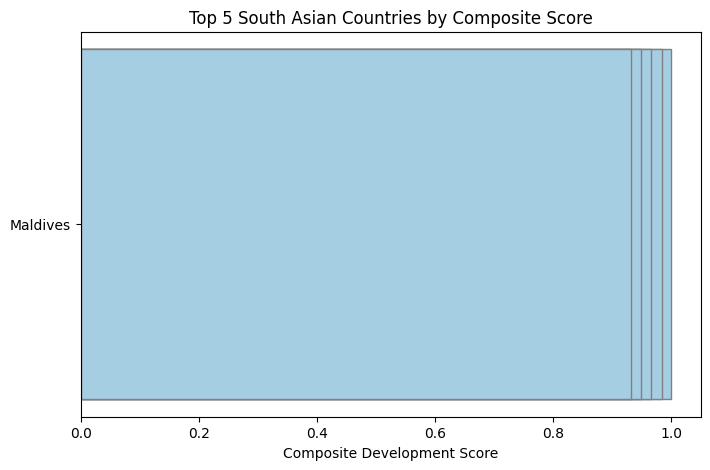


Comparison of Composite Score vs HDI Ranking:
          country  composite_score    hdi
0        Maldives         1.000000  0.762
1        Maldives         1.000000  0.753
2        Maldives         1.000000  0.753
3        Maldives         1.000000  0.747
4        Maldives         1.000000  0.740
...           ...              ...    ...
7482  Afghanistan         0.059739  0.307
7483  Afghanistan         0.059739  0.300
7484  Afghanistan         0.059739  0.299
7485  Afghanistan         0.059739  0.292
7486  Afghanistan         0.059739  0.284

[7487 rows x 3 columns]


In [ ]:
# ============================================================
# Problem 2: Advanced HDI Exploration
# ============================================================
# ============================================================
# 4. COMPOSITE DEVELOPMENT SCORE & TOP 5
# ============================================================

# Remove rows with missing key values for calculations
south_asia_df.dropna(subset=['hdi', 'life_expectancy', 'gross_inc_percap'], inplace=True)

# Normalize life expectancy (0 to 1 scale)
life_norm = (south_asia_df['life_expectancy'] - south_asia_df['life_expectancy'].min()) / \
            (south_asia_df['life_expectancy'].max() - south_asia_df['life_expectancy'].min())

# Normalize GNI per capita (0 to 1 scale)
gni_norm = (south_asia_df['gross_inc_percap'] - south_asia_df['gross_inc_percap'].min()) / \
           (south_asia_df['gross_inc_percap'].max() - south_asia_df['gross_inc_percap'].min())

# Compute composite development score (average of normalized life and GNI)
south_asia_df['composite_score'] = 0.5 * life_norm + 0.5 * gni_norm

# Rank countries by composite score
composite_rank = south_asia_df.sort_values(by='composite_score', ascending=False)

# Get top 5 countries by composite score
top5_composite = composite_rank.head(5)

# Plot top 5 composite score
plt.figure(figsize=(8, 5))
plt.barh(top5_composite['country'], top5_composite['composite_score'], color='#a6cee3', edgecolor='gray')
plt.xlabel("Composite Development Score")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.gca().invert_yaxis()  # Highest score on top
plt.show()

# Compare with HDI ranking
hdi_rank = south_asia_df.sort_values(by='hdi', ascending=False)[['country', 'hdi']]
comparison = composite_rank[['country', 'composite_score']].merge(hdi_rank, on='country')

# Display comparison
print("\nComparison of Composite Score vs HDI Ranking:")
print(comparison)


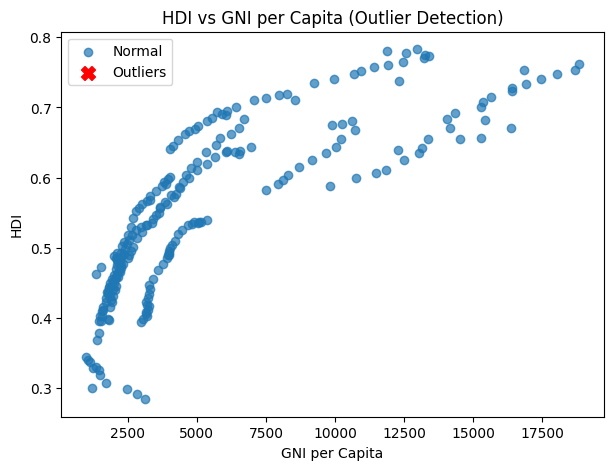

In [ ]:
# ============================================================
# Problem 2: Advanced HDI Exploration
# ============================================================
# ============================================================
# 5. HDI vs GNI per Capita (Outlier Detection)
# ============================================================

# Function to detect outliers using IQR method
def detect_outliers(series):
    q1 = series.quantile(0.25) # 25th percentile
    q3 = series.quantile(0.75) # 75th percentile
    iqr = q3 - q1     # Interquartile range
    lower = q1 - 1.5 * iqr  # Lower bound
    upper = q3 + 1.5 * iqr   # Upper bound
    return (series < lower) | (series > upper) # True if outlier

# Identify outliers in HDI and GNI per capita
south_asia_df['hdi_outlier'] = detect_outliers(south_asia_df['hdi'])
south_asia_df['gni_outlier'] = detect_outliers(south_asia_df['gross_inc_percap'])

# Plot HDI vs GNI per capita
plt.figure(figsize=(7, 5))

# Scatter normal data points
plt.scatter(
    south_asia_df.loc[~south_asia_df['hdi_outlier'], 'gross_inc_percap'],
    south_asia_df.loc[~south_asia_df['hdi_outlier'], 'hdi'],
    label="Normal", alpha=0.7
)

# Highlight outliers in red with 'X' marker
plt.scatter(
    south_asia_df.loc[south_asia_df['hdi_outlier'], 'gross_inc_percap'],
    south_asia_df.loc[south_asia_df['hdi_outlier'], 'hdi'],
    color='red', marker='X', s=100, label="Outliers"
)

# Axis labels and title
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita (Outlier Detection)")

# Add legend
plt.legend()

# Show plot
plt.show()

Correlation (HDI vs Life Expectancy): 0.959
Correlation (HDI vs Gender Development): 0.866


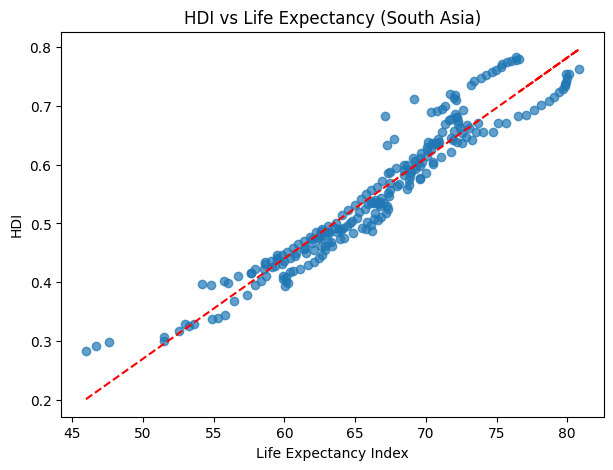

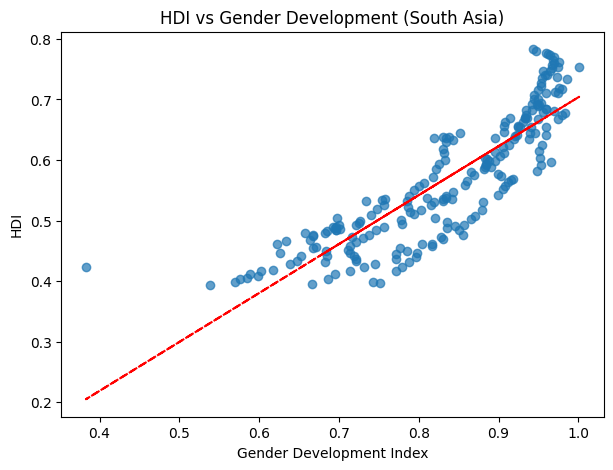

In [ ]:
# ============================================================
# Problem 2: Advanced HDI Exploration
# ============================================================
# ============================================================
# 6. HDI vs Life Expectancy & Gender Development
# ============================================================

# Create subsets for analysis, dropping missing values
life_subset = south_asia_df[['life_expectancy', 'hdi']].dropna()
gender_subset = south_asia_df[['gender_development', 'hdi']].dropna()

# Compute correlations
corr_life = life_subset['life_expectancy'].corr(life_subset['hdi'])
corr_gender = gender_subset['gender_development'].corr(gender_subset['hdi'])

# Print correlation results
print(f"Correlation (HDI vs Life Expectancy): {corr_life:.3f}")
print(f"Correlation (HDI vs Gender Development): {corr_gender:.3f}")

# HDI vs Life Expectancy
plt.figure(figsize=(7, 5))
plt.scatter(life_subset['life_expectancy'], life_subset['hdi'], alpha=0.7) # Scatter plot
if len(life_subset) > 1:
    m, b = np.polyfit(life_subset['life_expectancy'], life_subset['hdi'], 1) # Linear fit
    plt.plot(life_subset['life_expectancy'], m*life_subset['life_expectancy'] + b, linestyle='--', color='red') # Add regression line
plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("HDI vs Life Expectancy (South Asia)")
plt.show()

# HDI vs Gender Development
plt.figure(figsize=(7, 5))
plt.scatter(gender_subset['gender_development'], gender_subset['hdi'], alpha=0.7) # Scatter plot
if len(gender_subset) > 1:
    m, b = np.polyfit(gender_subset['gender_development'], gender_subset['hdi'], 1) # Linear fit
    plt.plot(gender_subset['gender_development'], m*gender_subset['gender_development'] + b, linestyle='--', color='red') # Add regression line
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("HDI vs Gender Development (South Asia)")
plt.show()


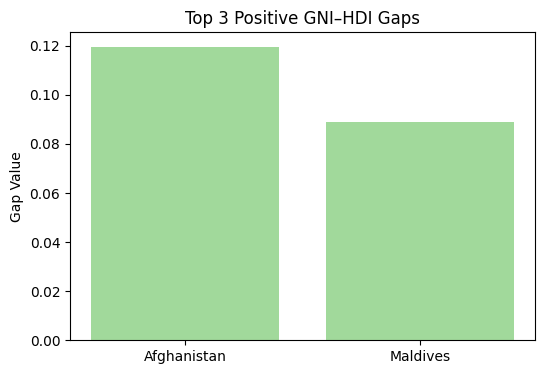

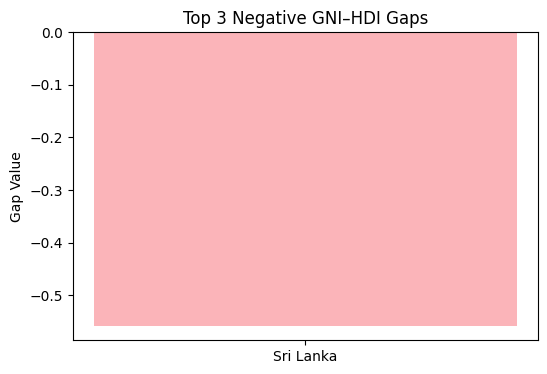

In [ ]:
# ============================================================
# Problem 2: Advanced HDI Exploration
# ============================================================
# ============================================================
# 7. Top 3 Positive & Negative GNI-HDI Gaps
# ============================================================

#Normalize HDI and GNI per capita (0 to 1 scale)
hdi_norm = (south_asia_df['hdi'] - south_asia_df['hdi'].min()) / (south_asia_df['hdi'].max() - south_asia_df['hdi'].min())
gni_norm = (south_asia_df['gross_inc_percap'] - south_asia_df['gross_inc_percap'].min()) / (south_asia_df['gross_inc_percap'].max() - south_asia_df['gross_inc_percap'].min())

# Compute GNI-HDI gap
south_asia_df['gni_hdi_gap'] = gni_norm - hdi_norm

# Top 3 positive gaps (GNI higher than HDI)
gap_desc = south_asia_df.sort_values(by='gni_hdi_gap', ascending=False)
plt.figure(figsize=(6, 4))
plt.bar(gap_desc.head(3)['country'], gap_desc.head(3)['gni_hdi_gap'], color='#a1d99b')  # light green
plt.title("Top 3 Positive GNI–HDI Gaps")
plt.ylabel("Gap Value")
plt.show()

# Top 3 negative gaps (HDI higher than GNI)
gap_asc = south_asia_df.sort_values(by='gni_hdi_gap')
plt.figure(figsize=(6, 4))
plt.bar(gap_asc.head(3)['country'], gap_asc.head(3)['gni_hdi_gap'], color='#fbb4b9')   # light pink
plt.title("Top 3 Negative GNI–HDI Gaps")
plt.ylabel("Gap Value")
plt.show()

In [ ]:
# ============================================================
# Problem 3: Comparative Regional Analysis - South Asia vs Middle East
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1. LOAD DATASET
# ============================================================

# Load HDI dataset
hdi_df = pd.read_csv("HDI_problem1B.csv", encoding="latin1", engine="python")

# Standardize column names and clean country names
hdi_df.columns = hdi_df.columns.str.strip().str.lower().str.replace("_", " ")
hdi_df['country'] = hdi_df['country'].astype(str).str.strip().str.title()

# Replace dash-like symbols with NaN
hdi_df.replace(["–", "-", "—"], np.nan, inplace=True)

# Convert numeric columns to numeric type
numeric_cols = hdi_df.columns.drop('country')
hdi_df[numeric_cols] = hdi_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# ============================================================
# 2. CREATE REGIONAL SUBSETS
# ============================================================

# List of South Asian countries
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]


# List of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter dataset for each region
sa_df = hdi_df[hdi_df['country'].isin(south_asia_countries)].copy()
me_df = hdi_df[hdi_df['country'].isin(middle_east_countries)].copy()

# Save regional subsets to CSV
sa_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
me_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)
print("Regional subsets saved successfully.")

# ============================================================
# 3. DESCRIPTIVE STATISTICS
# ============================================================

# Function to compute mean and standard deviation of HDI for a region
def describe_region(region_df, region_name):
    mean_hdi = region_df['hdi'].mean()
    std_hdi = region_df['hdi'].std()
    print(f"{region_name} → Mean HDI: {mean_hdi:.3f}, Std Dev: {std_hdi:.3f}")
    return mean_hdi, std_hdi

# Compute descriptive stats for South Asia and Middle East
sa_mean, sa_std = describe_region(sa_df, "South Asia")
me_mean, me_std = describe_region(me_df, "Middle East")

# Determine which region performs better on average
better_region = "South Asia" if sa_mean > me_mean else "Middle East"
print(f"Region performing better on average: {better_region}")

# ============================================================
# 4. TOP & BOTTOM PERFORMERS
# ============================================================

# Function to get top and bottom N performers based on HDI
def top_bottom(region_df, n=3):
    top = region_df.sort_values('hdi', ascending=False).head(n)
    bottom = region_df.sort_values('hdi', ascending=True).head(n)
    return top, bottom

# Top and bottom performers for each region
sa_top, sa_bottom = top_bottom(sa_df)
me_top, me_bottom = top_bottom(me_df)

Regional subsets saved successfully.
South Asia → Mean HDI: 0.640, Std Dev: 0.098
Middle East → Mean HDI: 0.789, Std Dev: 0.141
Region performing better on average: Middle East


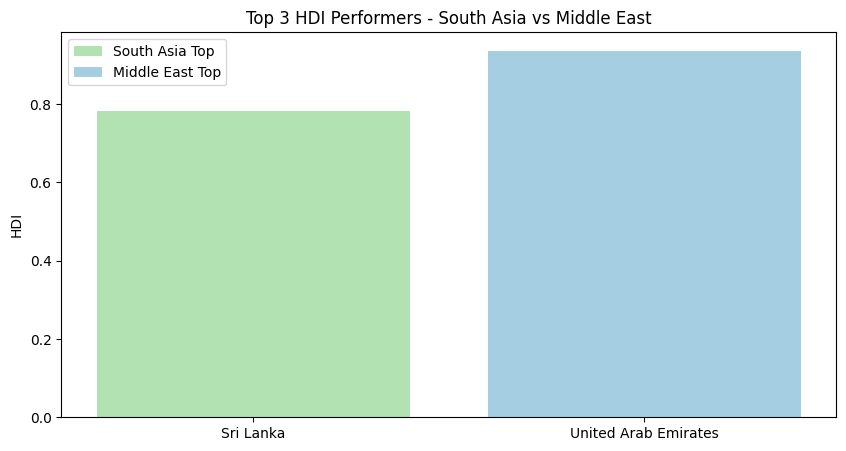

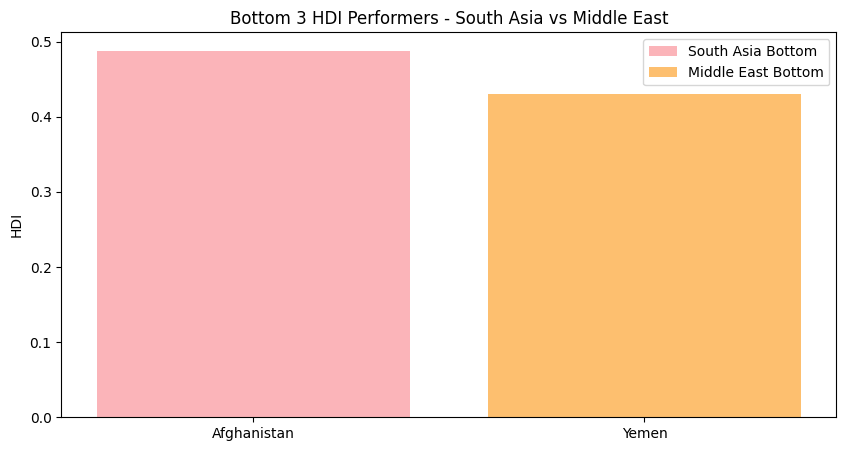

In [ ]:
# ============================================================
# Problem 3: Comparative Regional Analysis - South Asia vs Middle East
# ============================================================
# Top performers bar chart
plt.figure(figsize=(10,5))

# Plot top 3 South Asia HDI performers
plt.bar(sa_top['country'], sa_top['hdi'], color='#b2e2b2', label='South Asia Top')  # light green

# Plot top 3 Middle East HDI performers
plt.bar(me_top['country'], me_top['hdi'], color='#a6cee3', label='Middle East Top')  # light blue

# Chart labels and legend
plt.title("Top 3 HDI Performers - South Asia vs Middle East")
plt.ylabel("HDI")
plt.legend()
plt.show()

# Bottom performers bar chart
plt.figure(figsize=(10,5))

#Plot bottom 3 South Asia HDI performers
plt.bar(sa_bottom['country'], sa_bottom['hdi'], color='#fbb4b9', label='South Asia Bottom')  # light red/pink

#Plot bottom 3 Middle East HDI performers
plt.bar(me_bottom['country'], me_bottom['hdi'], color='#fdbf6f', label='Middle East Bottom')  # light orange

# Chart labels and legend
plt.title("Bottom 3 HDI Performers - South Asia vs Middle East")
plt.ylabel("HDI")
plt.legend()
plt.show()


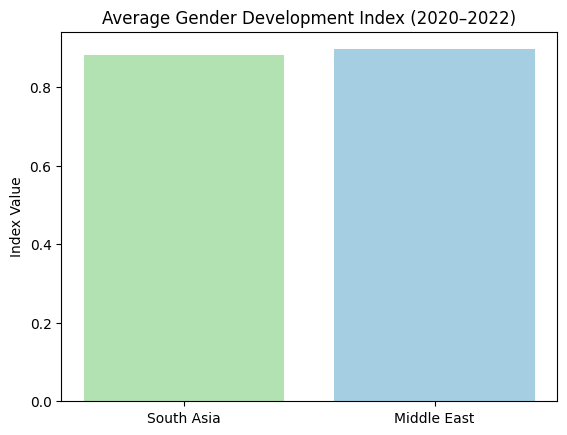

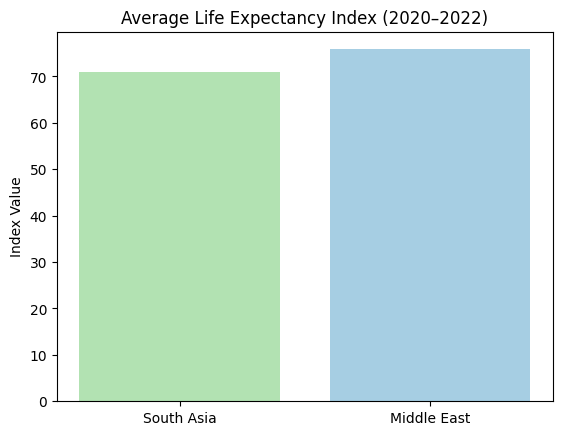

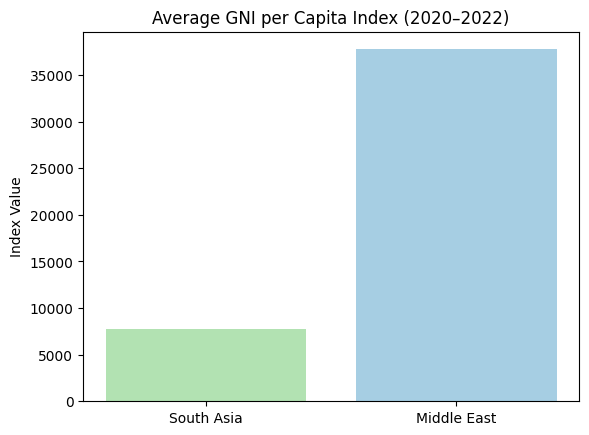

In [ ]:
# ============================================================
# Problem 3: Comparative Regional Analysis - South Asia vs Middle East
# ============================================================
# ============================================================
# 5. METRIC COMPARISONS
# ============================================================
metrics = {
    "gender development": "Gender Development Index",
    "life expectancy": "Life Expectancy Index",
    "gross inc percap": "GNI per Capita Index"
}

# colors for region
region_colors = ['#b2e2b2', '#a6cee3']  # light green for South Asia, light blue for Middle East

#Loop through metrics and plot average values for each region
for col, title in metrics.items():
    sa_mean = sa_df[col].mean() #Average value for South Asia
    me_mean = me_df[col].mean() #Average value for Middle East

    plt.figure()
    plt.bar(["South Asia", "Middle East"], [sa_mean, me_mean], color=region_colors)
    plt.title(f"Average {title} (2020–2022)")
    plt.ylabel("Index Value")
    plt.show()


South Asia → HDI Range: 0.321, Coefficient of Variation: 0.154
Middle East → HDI Range: 0.513, Coefficient of Variation: 0.179
Region with more variation in HDI: Middle East


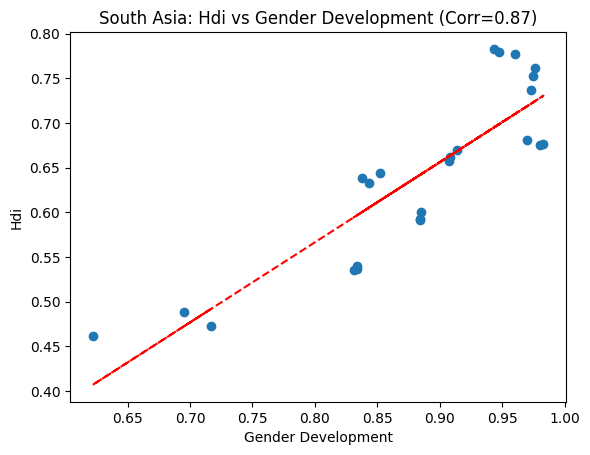

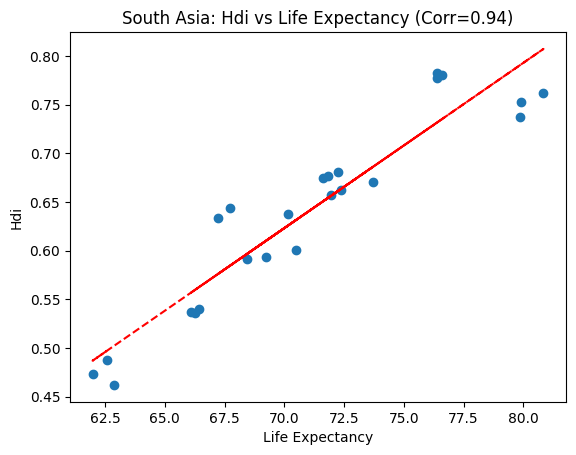

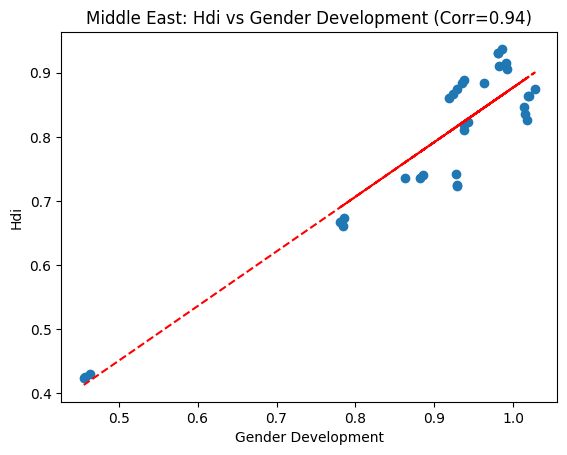

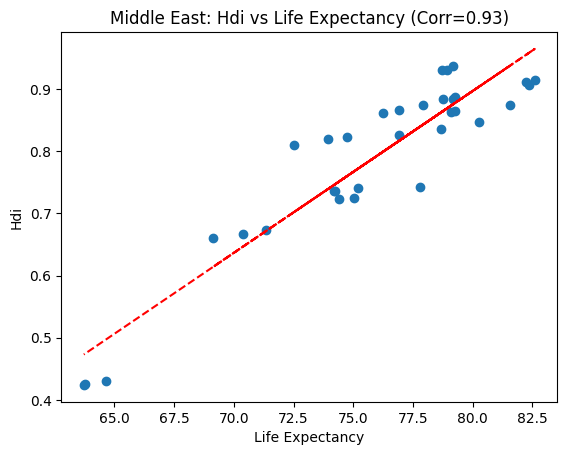

In [ ]:
# ============================================================
# Problem 3: Comparative Regional Analysis - South Asia vs Middle East
# ============================================================
# ============================================================
# 6. HDI DISPARITY
# ============================================================

# Function to compute HDI range and coefficient of variation for a region
def hdi_disparity(region_df, region_name):
    hdi_range = region_df['hdi'].max() - region_df['hdi'].min()  # Max-min range
    cv = region_df['hdi'].std() / region_df['hdi'].mean() # Coefficient of variation
    print(f"{region_name} → HDI Range: {hdi_range:.3f}, Coefficient of Variation: {cv:.3f}")
    return hdi_range, cv

# Compute HDI disparity for each region
sa_range, sa_cv = hdi_disparity(sa_df, "South Asia")
me_range, me_cv = hdi_disparity(me_df, "Middle East")

# Identify region with higher variation
more_variation = "South Asia" if sa_cv > me_cv else "Middle East"
print(f"Region with more variation in HDI: {more_variation}")

# ============================================================
# 7. CORRELATION ANALYSIS
# ============================================================

# Function to plot scatter and regression line for two variables in a region
def plot_correlation(region_df, x_col, y_col, region_name):
    subset = region_df[[x_col, y_col]].dropna() # Drop missing values
    plt.figure()
    plt.scatter(subset[x_col], subset[y_col])   # Scatter plot

    # Add linear trend line if enough data
    if len(subset) > 1:
        z = np.polyfit(subset[x_col], subset[y_col], 1)
        trend = np.poly1d(z)
        plt.plot(subset[x_col], trend(subset[x_col]), linestyle='--', color='red')

   # Compute correlation coefficient
    corr = subset[x_col].corr(subset[y_col])

    # Labels and title
    plt.xlabel(x_col.title())
    plt.ylabel(y_col.title())
    plt.title(f"{region_name}: {y_col.title()} vs {x_col.title()} (Corr={corr:.2f})")
    plt.show()

# Plot correlations for each region and selected metrics
for region_name, df_region in [("South Asia", sa_df), ("Middle East", me_df)]:
    plot_correlation(df_region, "gender development", "hdi", region_name)
    plot_correlation(df_region, "life expectancy", "hdi", region_name)

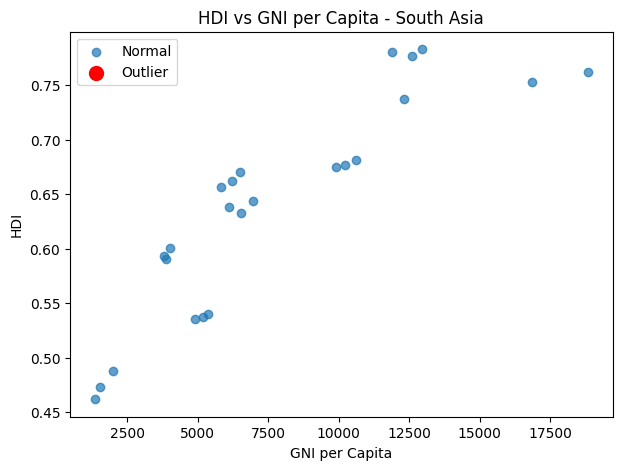

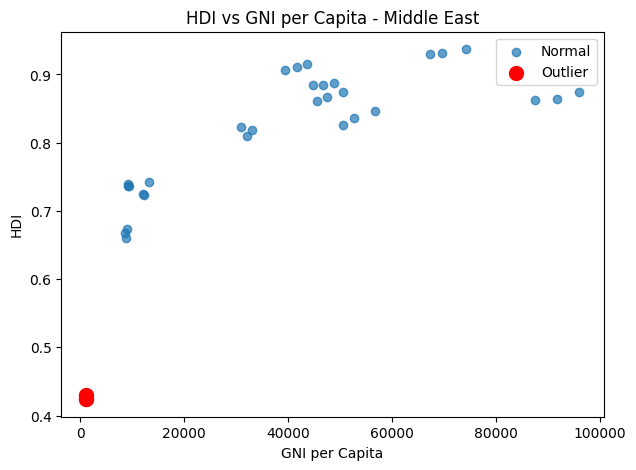

In [ ]:
# ============================================================
# Problem 3: Comparative Regional Analysis - South Asia vs Middle East
# ============================================================
# ============================================================
# 8. OUTLIER DETECTION
# ============================================================

# Function to detect outliers using IQR method
def detect_outliers(series):
    q1, q3 = series.quantile([0.25,0.75]) # 25th and 75th percentiles
    iqr = q3 - q1   # Interquartile range
    return (series < q1 - 1.5*iqr) | (series > q3 + 1.5*iqr) # Boolean mask

# Detect outliers and plot for each region
for region_name, df_region in [("South Asia", sa_df), ("Middle East", me_df)]:
    # Identify HDI and GNI per capita outliers
    df_region['hdi_outlier'] = detect_outliers(df_region['hdi'])
    df_region['gni_outlier'] = detect_outliers(df_region['gross inc percap'])

    plt.figure(figsize=(7,5))

    # Separate normal points and outliers
    normal = df_region[~df_region['hdi_outlier']]
    outliers = df_region[df_region['hdi_outlier']]

    # Scatter plot: normal vs outliers
    plt.scatter(normal['gross inc percap'], normal['hdi'], label='Normal', alpha=0.7)
    plt.scatter(outliers['gross inc percap'], outliers['hdi'], color='red', label='Outlier', s=100)

    # Axis labels, title, and legend
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.title(f"HDI vs GNI per Capita - {region_name}")
    plt.legend()
    plt.show()